# GROUP THREE: Buffers, or more interesting/complicated analysis

### 1.	Do states with coal power plants have dirtier air?

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import re
import fiona
%matplotlib inline

In [2]:
pd.set_option('max_columns', 80)

In [3]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [4]:
powerplants = pd.read_csv('powerplants.csv')
powerplants['geometry'] = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants)
powerplants.crs = {'init': 'epsg:4269'}
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [5]:
powerplants_states = gpd.sjoin(powerplants, states, how='inner', op='within')
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [6]:
powerplants_w_coal = powerplants_states[powerplants_states['PrimSource'] == 'coal']
powerplants_w_coal.head(4)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,1034.0,1034.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
18,26,E C Gaston,Alabama Power Co,195,Electric Utility,Wilsonville,Shelby,35186,31972 Highway 25 North,coal,1878.0,1606.0,256.0,16.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1606 MW, Natural Gas = 256 MW, Petroleu...",Conventional Steam Coal; Natural Gas Steam Tur...,"EIA-860, EIA-860M and EIA-923",201607,33.244211,-86.458056,POINT (-86.458056 33.244211),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
23,47,Colbert,Tennessee Valley Authority,18642,Electric Utility,Tuscumbia,Colbert,35674,900 Steam Plant Rd.,coal,835.2,472.0,363.2,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 472 MW, Natural Gas = 363.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,34.743900,-87.848600,POINT (-87.8486 34.7439),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL


In [7]:
air = pd.read_csv('pm25_annual_fixed.csv')
air['geometry'] = air.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
air = gpd.GeoDataFrame(air)
air.crs = {'init': 'epsg:4269'}
air.head(6)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (-87.638097 34.762619)
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,8.083333,3.146436,14.8,2017-03-05 00:00,14.6,2017-02-18 00:00,13.1,2017-02-21 00:00,12.3,2017-01-16 00:00,NaN,NaN,NaN,NaN,14.8,14.8,14.6,13.1,9.6,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (-85.969858 34.288567)
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,9.073333,4.340660,17.5,2017-01-16 00:00,16.7,2017-03-05 00:00,16.0,2017-02-18 00:00,15.6,2017-02-21 00:00,NaN,NaN,NaN,NaN,17.5,17.5,16.7,16.0,11.9,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18,POINT (-85.99264699999998 33.991494)
5,1,69,3,88101,1,31.224783,-85.390789,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,29,24,N,29,122,0,1,1.0,1.0,Certification not required,0,9.772414,8.039363,47.7,2017-01-13 00:00,18.3,2017-03-05 00:00,15.2,2017-03-17 00:00,13.4,2017-03-23 00:00,NaN,NaN,NaN,NaN,47.7,47.7,18.3,

In [8]:
air_states = gpd.sjoin(air, states, how='inner', op='within')
air_states.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL


In [9]:
states.set_index('NAME', inplace=True)

In [10]:
powerplants_w_coal.groupby('NAME')['NAME'].count()

NAME
Alabama            6
Alaska             4
Arizona            5
Arkansas           5
California         2
Colorado          10
Connecticut        1
Delaware           1
Florida           10
Georgia            6
Hawaii             1
Idaho              2
Illinois          22
Indiana           20
Iowa              18
Kansas             6
Kentucky          14
Louisiana          2
Maryland           7
Massachusetts      1
Michigan          16
Minnesota         12
Mississippi        3
Missouri          16
Montana            5
Nebraska          10
Nevada             3
New Hampshire      2
New Jersey         4
New Mexico         3
New York           5
North Carolina    13
North Dakota      10
Ohio              16
Oklahoma           6
Oregon             1
Pennsylvania      24
South Carolina     8
South Dakota       1
Tennessee          6
Texas             21
Utah               6
Virginia          10
Washington         1
West Virginia     11
Wisconsin         12
Wyoming           12
Name: NA

In [11]:
# There are no 'real states' that don't have a coal plant,
# so instead of comparing air quality between states that have and have not coal plants
# we can compare air quality (Micrograms/cubic meter of PM2.5) per coal plant in each state

states['coal_plants_count'] = powerplants_w_coal.groupby('NAME')['NAME'].count()
#states['coal_plants_count'].fillna(0, inplace=True)
states.coal_plants_count.sort_values()

NAME
Washington                                       1.0
Massachusetts                                    1.0
Hawaii                                           1.0
Delaware                                         1.0
Connecticut                                      1.0
Oregon                                           1.0
South Dakota                                     1.0
California                                       2.0
Idaho                                            2.0
New Hampshire                                    2.0
Louisiana                                        2.0
Nevada                                           3.0
Mississippi                                      3.0
New Mexico                                       3.0
New Jersey                                       4.0
Alaska                                           4.0
Montana                                          5.0
New York                                         5.0
Arkansas                                 

In [12]:
air_states.groupby('NAME')['Arithmetic Mean'].mean()

NAME
Alabama                  8.600705
Arizona                  7.126441
Arkansas                 7.344940
California               9.353585
Colorado                 5.868046
Delaware                 6.879896
District of Columbia     8.555833
Georgia                  9.022554
Hawaii                   5.330897
Idaho                    4.524000
Illinois                 8.940669
Indiana                  8.702382
Iowa                     7.761547
Kansas                   7.531491
Kentucky                 6.542209
Maine                    7.061812
Maryland                 6.936176
Michigan                 9.355104
Missouri                10.586364
Nebraska                 6.948247
Nevada                   5.594904
New Mexico               6.390000
New York                 7.159793
North Carolina           7.767338
North Dakota             6.180000
Ohio                     8.475374
Oklahoma                 8.236667
Pennsylvania            10.068889
Rhode Island             6.331694
South Car

In [13]:
states['air_q'] = air_states.groupby('NAME')['Arithmetic Mean'].mean()
#states['air_q'].fillna(0, inplace=True)
states.air_q.sort_values()

NAME
Idaho                                            4.524000
Wyoming                                          4.886757
Hawaii                                           5.330897
Nevada                                           5.594904
Colorado                                         5.868046
Virginia                                         6.125842
North Dakota                                     6.180000
Rhode Island                                     6.331694
New Mexico                                       6.390000
Kentucky                                         6.542209
Delaware                                         6.879896
Maryland                                         6.936176
Nebraska                                         6.948247
Maine                                            7.061812
Arizona                                          7.126441
Tennessee                                        7.158605
New York                                         7.159793
South Car

In [14]:
states['air_q_per_coal_plant'] = states.air_q / states.coal_plants_count
#states['air_q_per_coal_plant'].fillna(0, inplace=True)
states.air_q_per_coal_plant.sort_values()

NAME
Illinois                                         0.406394
Wyoming                                          0.407230
Pennsylvania                                     0.419537
Iowa                                             0.431197
Indiana                                          0.435119
Kentucky                                         0.467301
Ohio                                             0.529711
Michigan                                         0.584694
Colorado                                         0.586805
North Carolina                                   0.597488
Virginia                                         0.612584
North Dakota                                     0.618000
Missouri                                         0.661648
Nebraska                                         0.694825
Wisconsin                                        0.732653
West Virginia                                    0.779554
South Carolina                                   0.895698
Maryland 

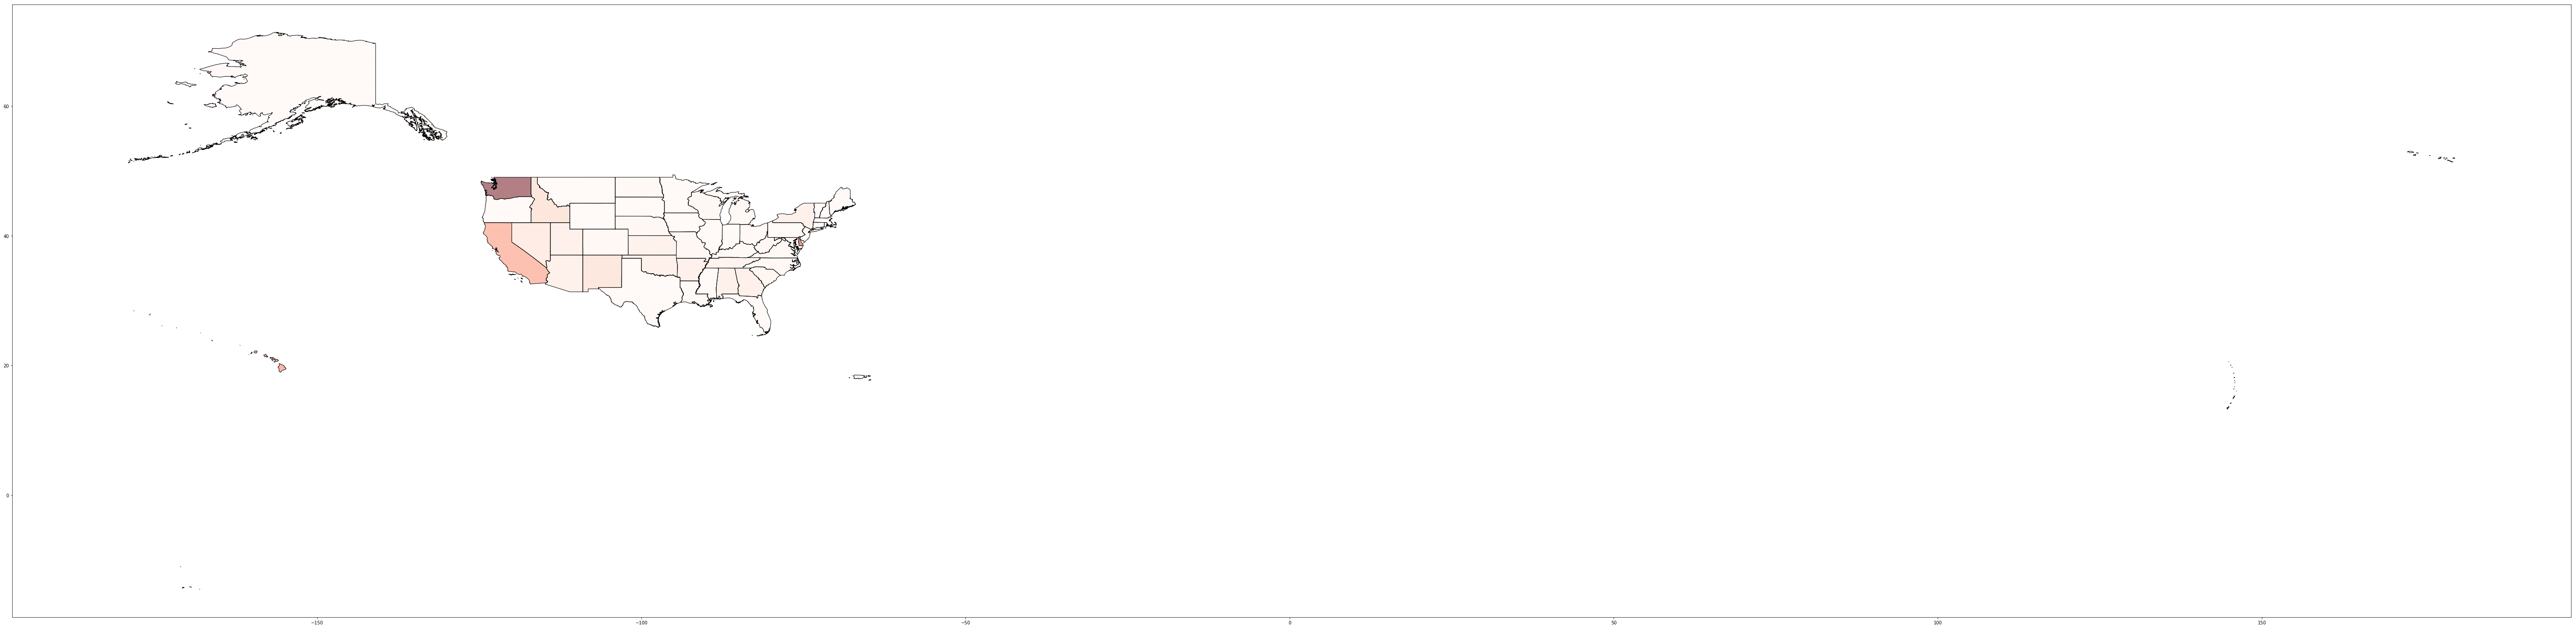

In [15]:
states.plot(column='air_q_per_coal_plant', cmap='Reds', figsize=(140,25))

### 2.	Which power plants are within 75 miles of New York City?

In [16]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

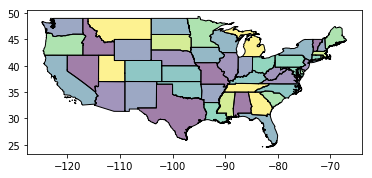

In [17]:
continental_bounds = [
            [
              -128.671875,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              50.28933925329178
            ],
            [
              -128.671875,
              50.28933925329178
            ],
            [
              -128.671875,
              22.268764039073968
            ]
        ]

continental_box = Polygon(continental_bounds)
continental_states = states[states.within(continental_box)]
continental_states.plot()

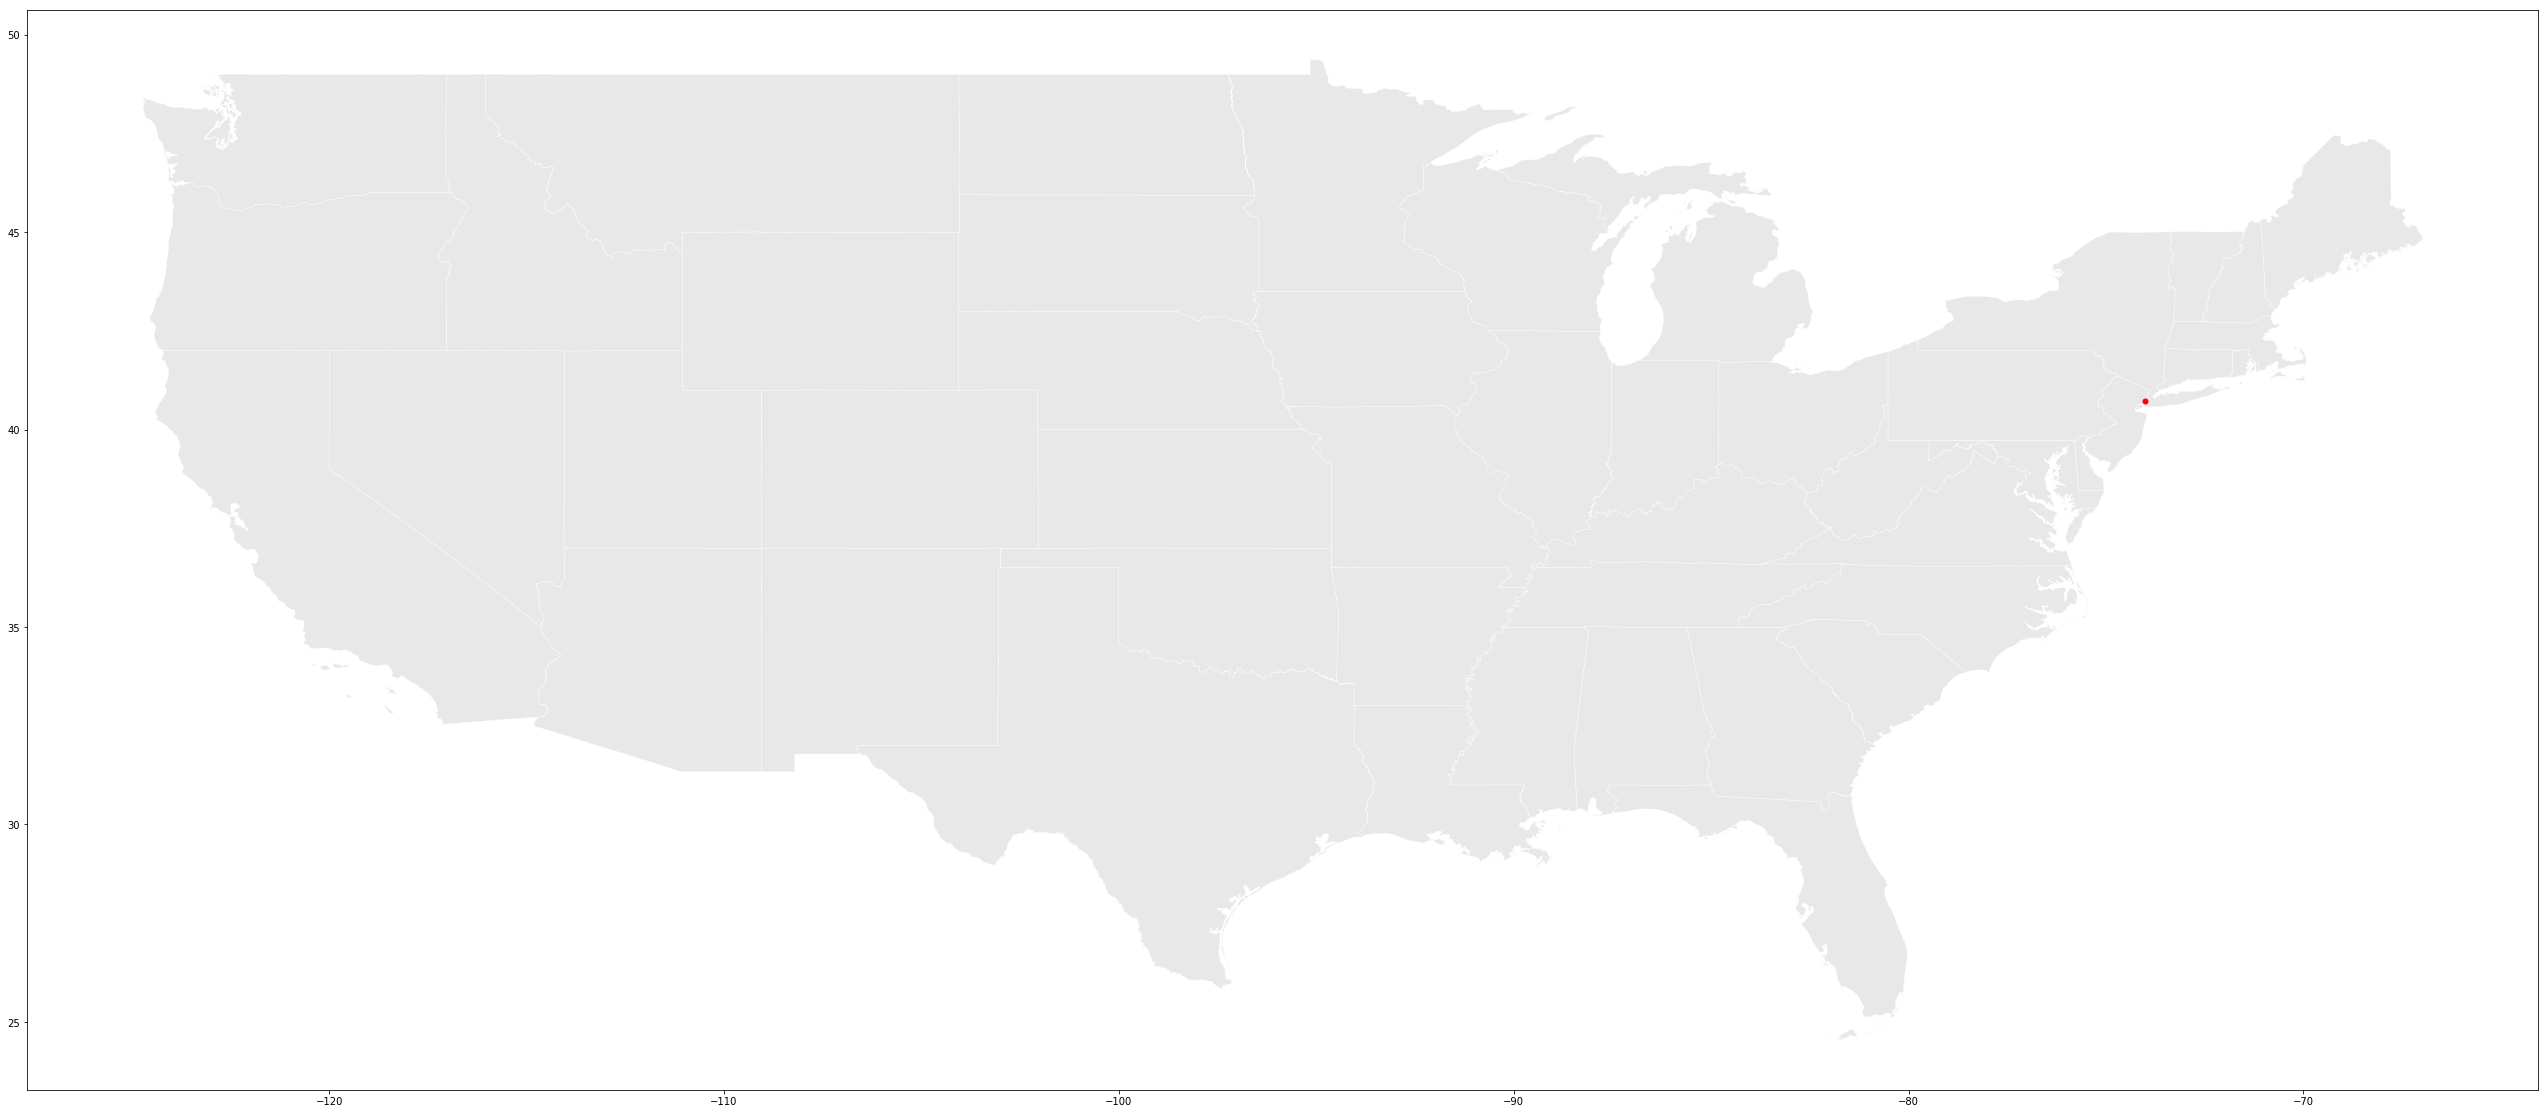

In [18]:
## Trying to plot a point with the lon,lat of NYC without creating or using a DataFrame
## I stumbled upon gpd.plotting.plot_point() / gpd.plotting.plot_polygon()
## You have two requirements for this to plot a point: ax and pt(point)/poly(polygon)
ax = continental_states.plot(color='lightgrey', edgecolor='white', linewidth=0.3, figsize=(45,45))
new_york = gpd.plotting.plot_point(ax=ax, pt = Point(-74.0059413, 40.7127837), color='red', markersize=5)

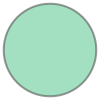

In [19]:
## .buffer() is a polygon
## So we can use that to build our buffer circle
## AND find the powerplants that are within that buffer circle
Point(-74.0059413, 40.7127837).buffer(2)

In [20]:
type(Point(-74.0059413, 40.7127837).buffer(2))

shapely.geometry.polygon.Polygon

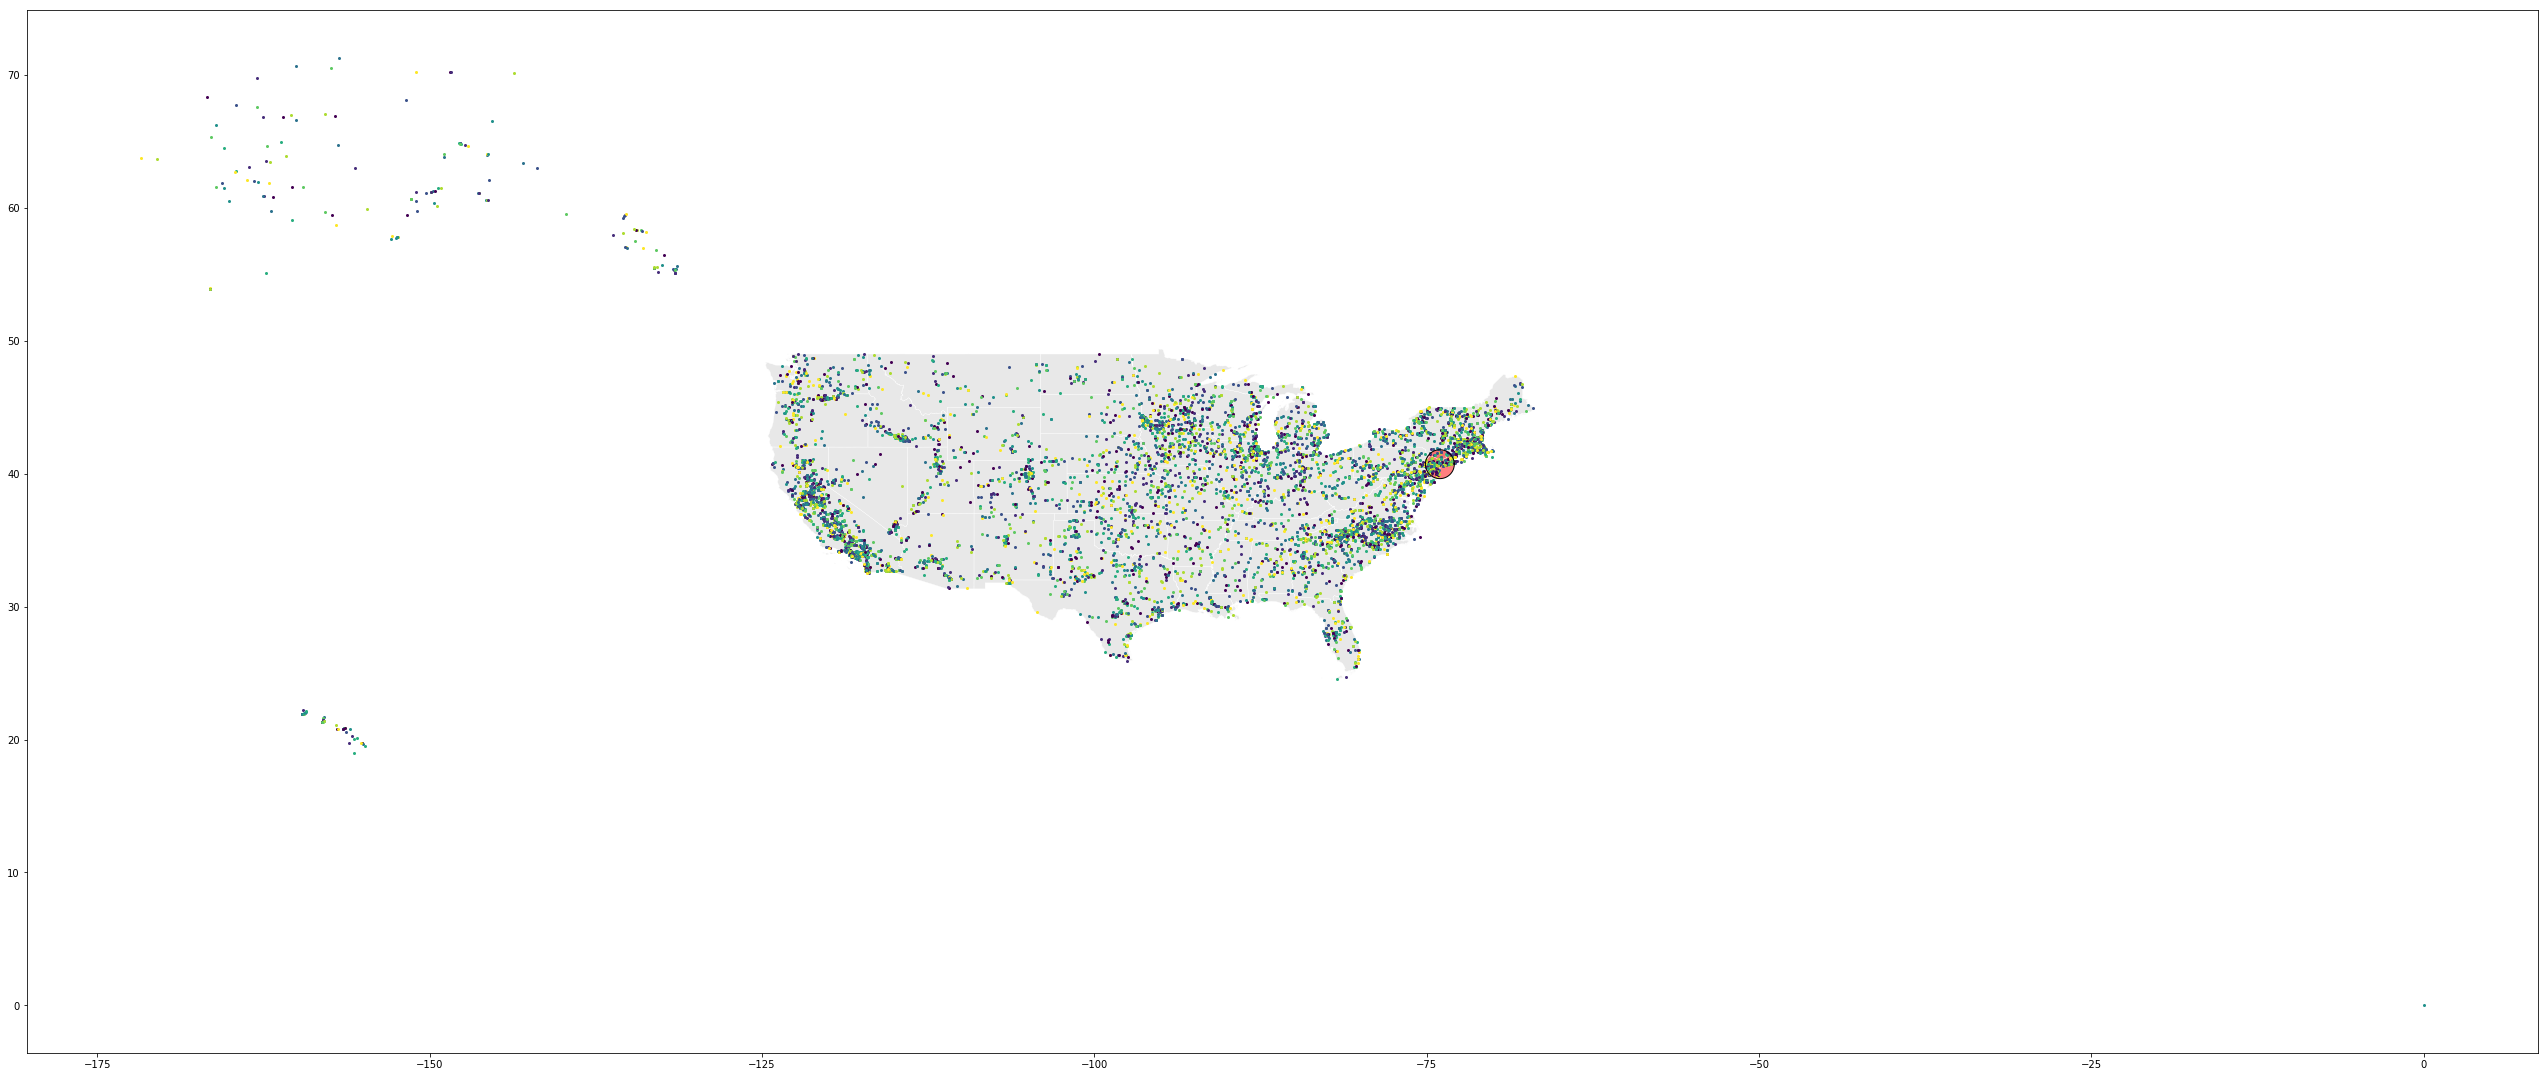

In [21]:
## Plot the states
ax = continental_states.plot(color='lightgrey', edgecolor='white', linewidth=0.3, figsize=(45,45))
## Plot the plants
powerplants.plot(ax=ax)
## Plot New York City point and its buffer
## 1 degree of lat = 69 miles --> 75 miles = 1.08695652174
new_york_buffer = Point(-74.0059413, 40.7127837).buffer(1.08695652174)
## buffer is a polygon, so we use plot_polygon()
gpd.plotting.plot_polygon(ax=ax, poly=new_york_buffer)

In [22]:
## Which powerplants are within that buffer?
powerplants[powerplants.within(new_york_buffer)]#.plot()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
341,539,Rocky River (CT),FirstLight Power Resources Services LLC,54895,IPP Non-CHP,New Milford,Litchfield,6776,200 Kent Road,pumped storage,29.4,0.0,0.0,0.0,NaN,0.0,29.4,0.0,0.0,0.0,NaN,NaN,Pumped Storage = 29.4 MW,Hydroelectric Pumped Storage,"EIA-860, EIA-860M and EIA-923",201607,41.582600,-73.434900,POINT (-73.4349 41.5826)
343,541,Bulls Bridge,FirstLight Power Resources Services LLC,54895,IPP Non-CHP,New Milford,Litchfield,6776,781 Kent Road,hydroelectric,8.4,0.0,0.0,0.0,NaN,8.4,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 8.4 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.659046,-73.491984,POINT (-73.491984 41.659046)
344,542,Cos Cob,Connecticut Jet Power LLC,22379,IPP Non-CHP,Greenwich,Fairfield,6430,Sound Shore Drive,petroleum,95.6,0.0,0.0,95.6,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Petroleum = 95.6 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,41.028900,-73.598900,POINT (-73.5989 41.0289)
345,544,Devon Station,Devon Power LLC,22350,IPP Non-CHP,Milford,New Haven,6460,734 Naugatuck Avenue,petroleum,132.5,0.0,0.0,132.5,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Petroleum = 132.5 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,41.209797,-73.108976,POINT (-73.108976 41.20979699999999)
350,552,Shepaug,FirstLight Power Resources Services LLC,54895,IPP Non-CHP,Southbury,New Haven,6488,2225 River Road,hydroelectric,41.5,0.0,0.0,0.0,NaN,41.5,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 41.5 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.448420,-73.295321,POINT (-73.295321 41.44842)
351,553,Stevenson,FirstLight Power Resources Services LLC,54895,IPP Non-CHP,Monroe,Fairfield,6468,1 Roosevelt Drive,hydroelectric,28.9,0.0,0.0,0.0,NaN,28.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 28.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.383300,-73.171400,POINT (-73.17140000000001 41.3833)
362,568,Bridgeport Station,PSEG Power Connecticut LLC,15452,IPP Non-CHP,Bridgeport,Fairfield,6604,1 Atlantic Street,coal,400.3,383.4,0.0,16.9,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 383.4 MW, Petroleum = 16.9 MW",Conventional Steam Coal; Petroleum Liquids;,"EIA-860, EIA-860M and EIA-923",201607,41.170600,-73.184400,POINT (-73.1844 41.1706)
1147,2388,Oyster Creek,Exelon Nuclear,55951,IPP Non-CHP,Forked River,Ocean,8731,PO Box 388,nuclear,607.7,0.0,0.0,0.0,NaN,0.0,0.0,607.7,0.0,0.0,NaN,NaN,Nuclear = 607.7 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,39.814300,-74.206200,POINT (-74.2062 39.8143)
1148,2390,Sayreville,NRG REMA LLC,17235,IPP Non-CHP,Sayerville,Middlesex,8872,River Road,natural gas,200.0,0.0,150.0,50.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Natural Gas = 150 MW, Petroleum = 50 MW",Natural Gas Fired Combustion Turbine; Petroleu...,"EIA-860, EIA-860M and EIA-923",201607,40.476525,-74.352336,POINT (-74.35233599999999 40.476525)
1150,2398,Bergen Generating Station,PSEG Fossil LLC,15147,IPP Non-CHP,Ridgefield,Bergen,7657,Victoria Terrace,natural gas,1223.0,0.0,1223.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 1223 MW,Natural Gas Fired Combined Cycle,"EIA-860, EIA-860M and EIA-923",201607,40.837500,-74.024400,POINT (-74.0244 40.8375)


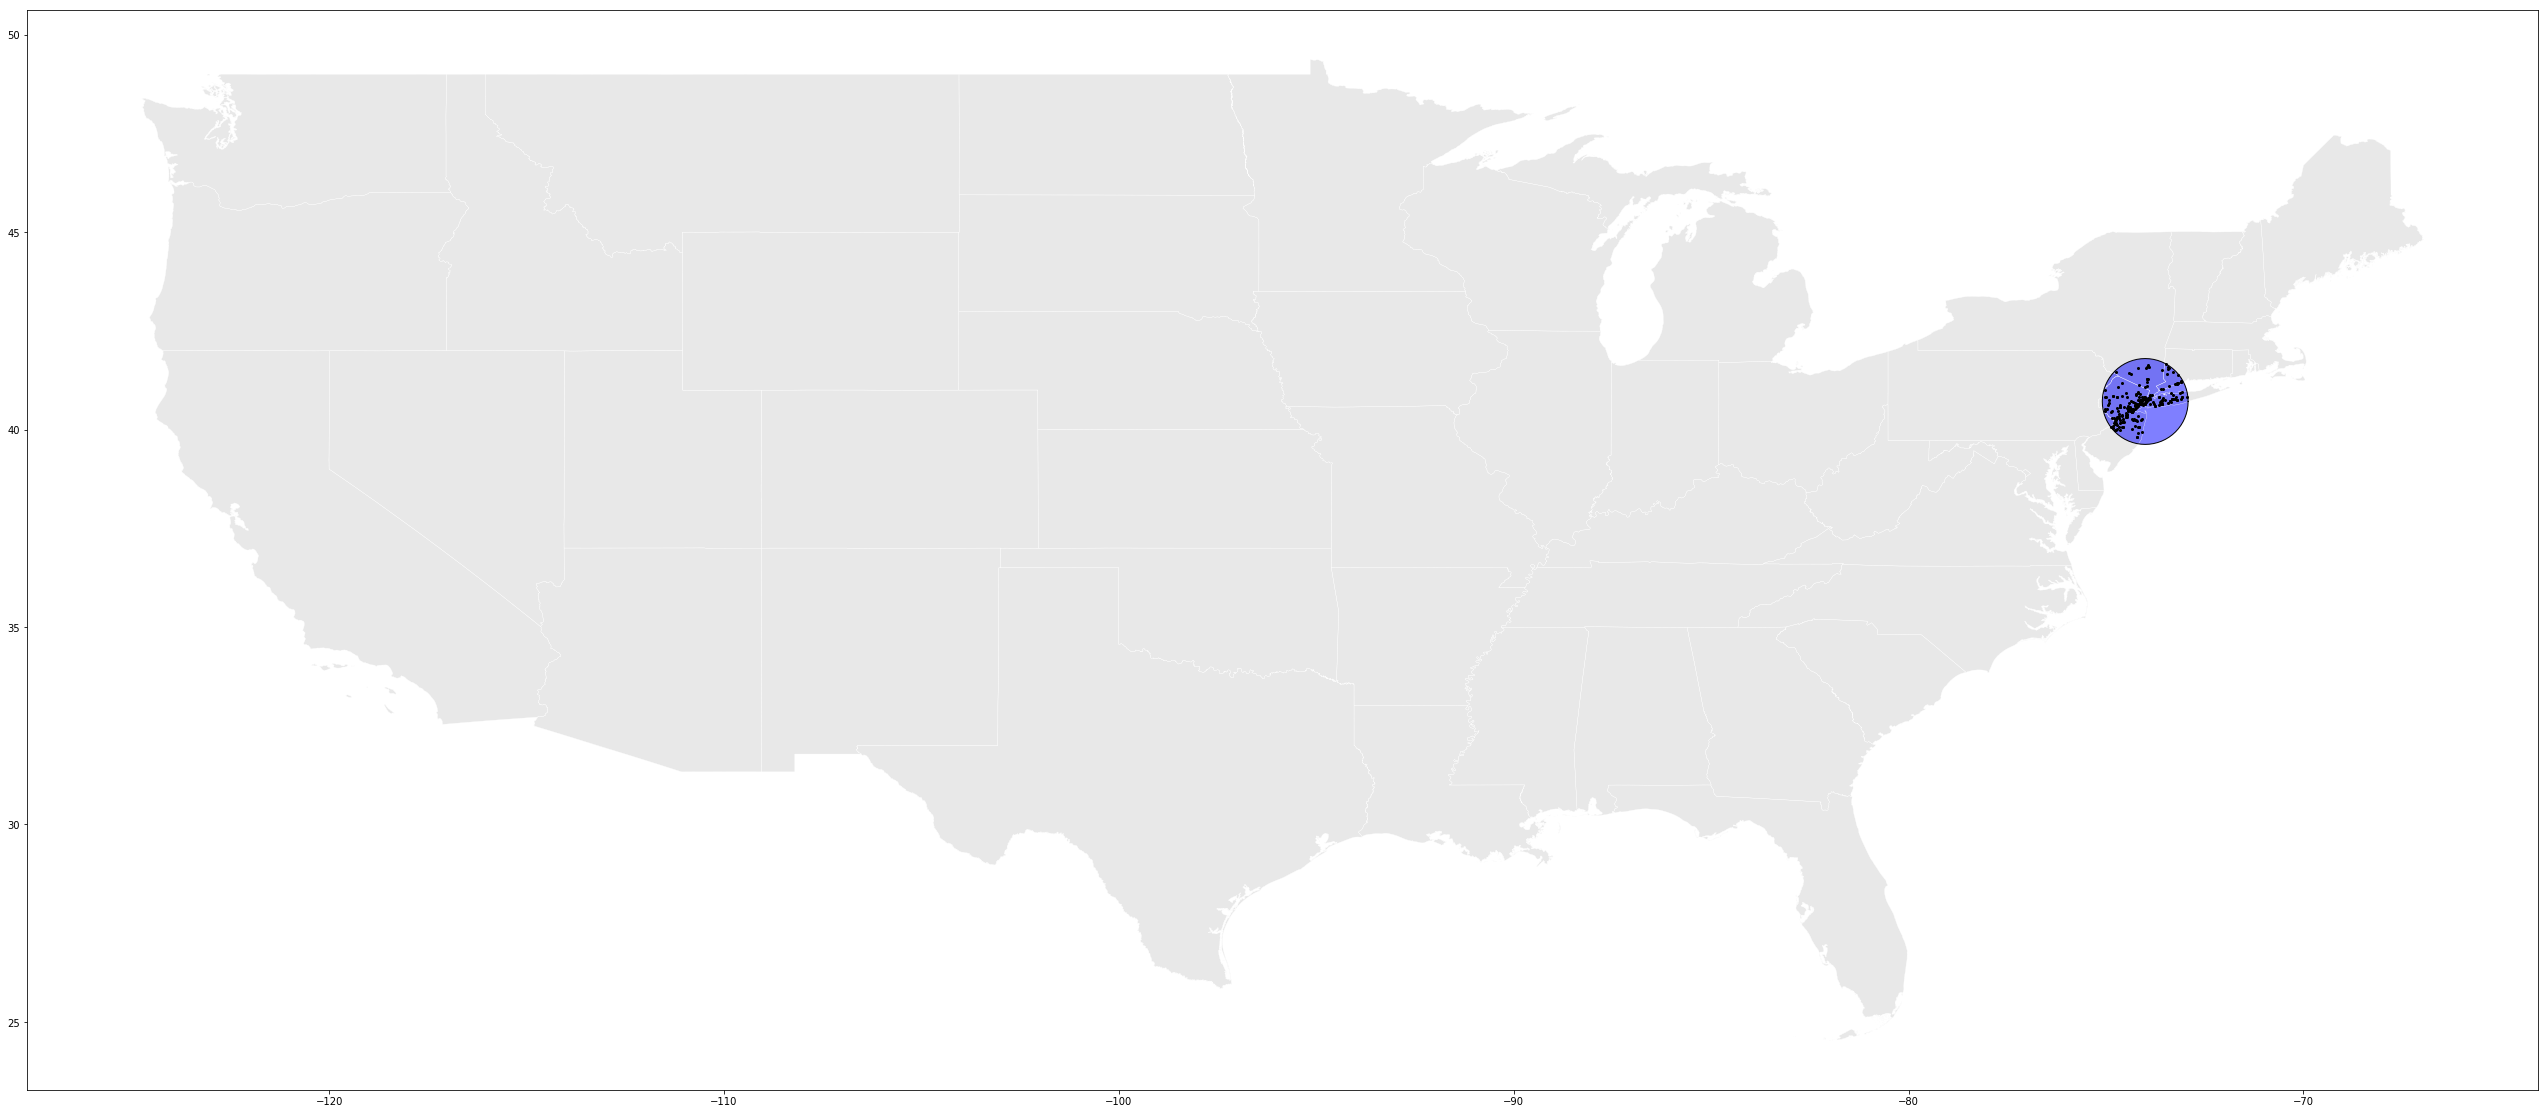

In [23]:
# Now let's plot only the powerplants that are inside that buffer

## Plot the states
ax = continental_states.plot(color='lightgrey', edgecolor='white', linewidth=0.3, figsize=(45,45))
## Plot New York City point and its buffer
## 1 degree of lat = 69 miles --> 75 miles = 1.08695652174
## Source: https://www2.usgs.gov/faq/categories/9794/3022
new_york_buffer = Point(-74.0059413, 40.7127837).buffer(1.08695652174)
## Buffer is a polygon, so we use plot_polygon()
gpd.plotting.plot_polygon(ax=ax, poly=new_york_buffer, facecolor='blue')
## Plot the powerplants that are inside that buffer
## !! You need to have the powerplants at the end of the code, because
## within reads the geometry we are defining in new_york_buffer above
## Plot the dataframe that includes only the powerplants that are within the geometry we defined above
powerplants[powerplants.within(new_york_buffer)].plot(ax=ax, color='black')

### 3.	Map all of the power plants in New York, New Jersey, Pennsylvania and Connecticut. Have a nice bottom layer of those 4 states.

In [24]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [25]:
nynjpenncut_boundary = [
    [-75.319519043,40.4636663246],
    [-73.4353637695,40.4636663246],
    [-73.4353637695,41.6400783847],
    [-75.319519043,41.6400783847],
    [-75.319519043,40.4636663246]
]

nynjpenncut_box = Polygon(nynjpenncut_boundary)
nynjpenncut_states = states[states.intersects(nynjpenncut_box)]
nynjpenncut_states = nynjpenncut_states[nynjpenncut_states.NAME != 'Rhode Island']
nynjpenncut_states

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
6,0400000US09,12542638347,1815476291,09,00,Connecticut,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41..."
21,0400000US34,19050755048,3541927612,34,00,New Jersey,34,01779795,NJ,"POLYGON ((-75.559102 39.629056, -75.5594459999..."
25,0400000US42,115882226263,3396805575,42,00,Pennsylvania,42,01779798,PA,"POLYGON ((-80.519891 40.906661, -80.519091 40...."
43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY,"(POLYGON ((-72.0368298202051 41.2498425393847,..."


In [26]:
powerplants_nynjpenncut = powerplants[powerplants.within(nynjpenncut_box)]
powerplants_nynjpenncut.crs

{'init': 'epsg:4269'}

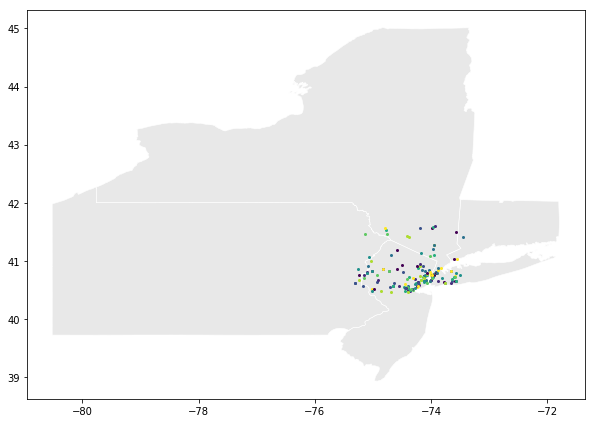

In [27]:
ax = nynjpenncut_states.plot(figsize=(10,10), color='lightgrey', edgecolor='white', linewidth=0.5)
powerplants_nynjpenncut.plot(ax=ax)

### 4.	What is the most popular power source by state?

In [28]:
powerplants = pd.read_csv('powerplants.csv')
powerplants['geometry'] = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants)
powerplants.crs = {'init': 'epsg:4269'}
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [29]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [30]:
powerplants_states = gpd.sjoin(powerplants, states, how='inner', op='within')
powerplants_states.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL


In [31]:
states.set_index('NAME', inplace=True)
states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry
NAME,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."


In [32]:
primsource = powerplants_states.groupby('NAME')['PrimSource'].value_counts().groupby(level=0).head(1).to_frame()
primsource.rename(columns={'PrimSource':'counts'}, inplace=True)
primsource.reset_index(inplace=True)
primsource.head(4)

,NAME,PrimSource,counts
0,Alabama,hydroelectric,23
1,Alaska,petroleum,90
2,Arizona,solar,57
3,Arkansas,hydroelectric,19


In [33]:
states = states.merge(primsource, left_index=True, right_on='NAME')
states.head(5)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,NAME,PrimSource,counts
0,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",Alabama,hydroelectric,23
1,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",Alaska,petroleum,90
2,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",Arizona,solar,57
3,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",Arkansas,hydroelectric,19
4,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",California,solar,390


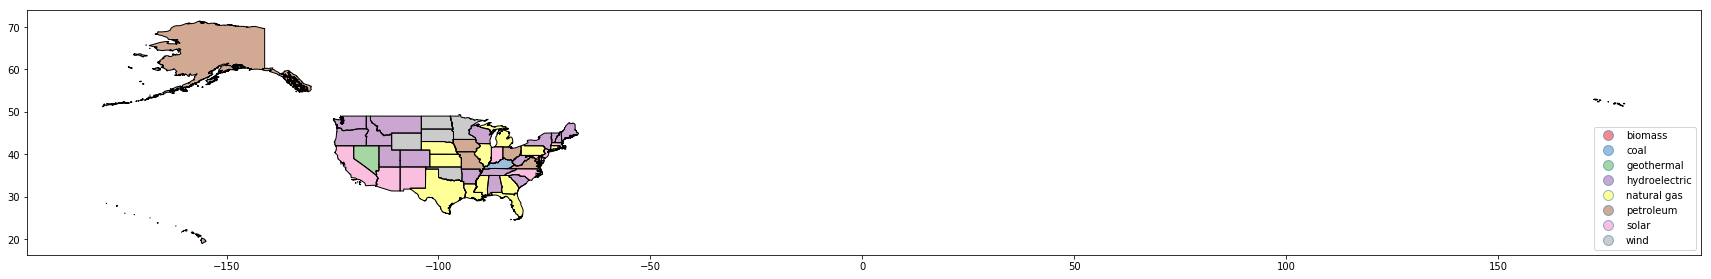

In [34]:
states.plot(column='PrimSource', figsize=(30,30), legend=True)

### 5.	Get the average (or highest/worst) PM2.5 within 138 miles of each power plant (you pick the distance). Is coal dirtier than other kinds of plants?

In [35]:
powerplants = pd.read_csv('powerplants.csv')
powerplants['geometry'] = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants)
powerplants.crs = {'init': 'epsg:4269'}
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [36]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [37]:
continental_bounds = [
            [
              -128.671875,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              50.28933925329178
            ],
            [
              -128.671875,
              50.28933925329178
            ],
            [
              -128.671875,
              22.268764039073968
            ]
        ]

continental_box = Polygon(continental_bounds)
continental_states = states[states.within(continental_box)]
#continental_states.plot()

In [38]:
continental_plants = powerplants[powerplants.within(continental_box)]
continental_plants.head(3)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,225.9,0.0,0.0,0.0,NaN,225.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889)


In [39]:
continental_plants['geometry'] = continental_plants.buffer(2)
continental_plants

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,"POLYGON ((-85.35682299999999 33.458665, -85.36..."
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,"POLYGON ((-86.0103 31.0069, -86.0199305466556 ..."
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,225.9,0.0,0.0,0.0,NaN,225.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,"POLYGON ((-84.283056 32.583889, -84.2926865466..."
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,130.0,0.0,130.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,"POLYGON ((-83.9708 34.0128, -83.9804305466556 ..."
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,1034.0,1034.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,"POLYGON ((-85.19648599999999 33.644344, -85.20..."
5,9,Copper,El Paso Electric Co,5701,Electric Utility,El Paso,El Paso,79915,651 Hawkins Blvd.,natural gas,62.0,0.0,62.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 62 MW,Natural Gas Fired Combustion Turbine,"EIA-860, EIA-860M and EIA-923",201607,31.756900,-106.375000,"POLYGON ((-104.375 31.7569, -104.3846305466556..."
6,10,Greene County,Alabama Power Co,195,Electric Utility,Demopolis,Greene,36732,Highway 43,natural gas,1237.0,497.0,740.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 497 MW, Natural Gas = 740 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,32.601700,-87.781100,"POLYGON ((-85.7811 32.6017, -85.7907305466556 ..."
7,11,H Neely Henry Dam,Alabama Power Co,195,Electric Utility,Ohatchee,Calhoun,36271,1021 Ala Highway 144,hydroelectric,70.0,0.0,0.0,0.0,NaN,70.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 70 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.784500,-86.052400,"POLYGON ((-84.05240000000001 33.7845, -84.0620..."
8,12,Holt Dam,Alabama Power Co,195,Electric Utility,Tuscaloosa,Tuscaloosa,35476,12117 Power Plant Road,hydroelectric,45.0,0.0,0.0,0.0,NaN,45.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 45 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.255300,-87.449500,"POLYGON ((-85.4495 33.2553, -85.4591305466556 ..."
9,13,Jordan Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,6150Jordan Dam Lane,hydroelectric,100.0,0.0,0.0,0.0,NaN,100.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 100 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.618900,-86.254800,"POLYGON ((-84.2548 32.6189, -84.2644305466556 ..."


In [40]:
air = pd.read_csv('pm25_annual_fixed.csv')
air['geometry'] = air.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
air = gpd.GeoDataFrame(air)
air.crs = {'init': 'epsg:4269'}
air.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)


In [41]:
continental_plants_air = gpd.sjoin(continental_plants, air, how='inner', op='contains')
continental_plants_air

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude_left,Longitude_left,geometry,index_right,State Code,County Code,Site Num,Parameter Code,POC,Latitude_right,Longitude_right,Datum,Parameter Name,Sample Duration,...,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,"POLYGON ((-85.35682299999999 33.458665, -85.36...",2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,...,No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,130.0,0.0,130.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,"POLYGON ((-83.9708 34.0128, -83.9804305466556 ...",2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,...,No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,1034.0,1034.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,"POLYGON ((-85.19648599999999 33.644344, -85.20...",2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,...,No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18
7,11,H Neely Henry Dam,Alabama Power Co,195,Electric Utility,Ohatchee,Calhoun,36271,1021 Ala Highway 144,hydroelectric,70.0,0.0,0.0,0.0,NaN,70.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 70 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.784500,-86.052400,"POLYGON ((-84.05240000000001 33.7845, -84.0620...",2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,...,No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florenc

In [42]:
continental_plants_air.groupby('Plant_Name')['Arithmetic Mean'].mean().sort_values(ascending=False).head(6)

Plant_Name
Ice Harbor                     16.268421
Columbia Generating Station    16.268421
Rock Island                    16.268421
Chief Joseph                   16.268421
Russell D Smith                16.268421
Threemile Digester             16.268421
Name: Arithmetic Mean, dtype: float64

In [43]:
continental_plants_air.groupby('Plant_Name')['1st Max Value'].mean().sort_values(ascending=False).head(6)

Plant_Name
Enel Cove Fort                 66.233333
eBay - South Jordan            54.581818
Salt Palace Solar Gen Plant    54.581818
Cutler Hydro                   54.581818
Deer Creek (UT)                54.581818
Provo                          54.581818
Name: 1st Max Value, dtype: float64

In [44]:
continental_plants_air.groupby('PrimSource')['Arithmetic Mean'].mean().sort_values(ascending=False)

PrimSource
other             8.581923
pumped storage    8.457052
natural gas       8.409960
wind              8.391162
biomass           8.303999
nuclear           8.286194
coal              8.111619
solar             8.103156
hydroelectric     8.096190
petroleum         8.068001
geothermal        7.513446
Name: Arithmetic Mean, dtype: float64

In [45]:
continental_plants_air.groupby('PrimSource')['1st Max Value'].mean().sort_values(ascending=False)

PrimSource
geothermal        22.298481
wind              21.606718
other             20.885418
natural gas       20.701301
hydroelectric     20.462315
biomass           20.438813
nuclear           20.090365
pumped storage    19.877698
coal              19.861342
petroleum         19.573057
solar             19.415396
Name: 1st Max Value, dtype: float64

### 6.	Make a map of the power plants within 150 miles of New York City. I want it centered on New York City, zoomed in a good amount.

In [46]:
powerplants = pd.read_csv('powerplants.csv')
powerplants['geometry'] = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants)
powerplants.crs = {'init': 'epsg:4269'}
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [47]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

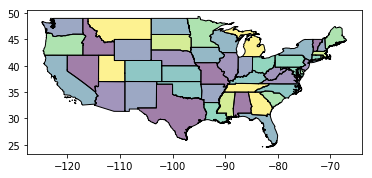

In [48]:
continental_bounds = [
            [
              -128.671875,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              50.28933925329178
            ],
            [
              -128.671875,
              50.28933925329178
            ],
            [
              -128.671875,
              22.268764039073968
            ]
        ]

continental_box = Polygon(continental_bounds)
continental_states = states[states.within(continental_box)]
continental_states.plot()

[-77, -70, 38, 43.5]

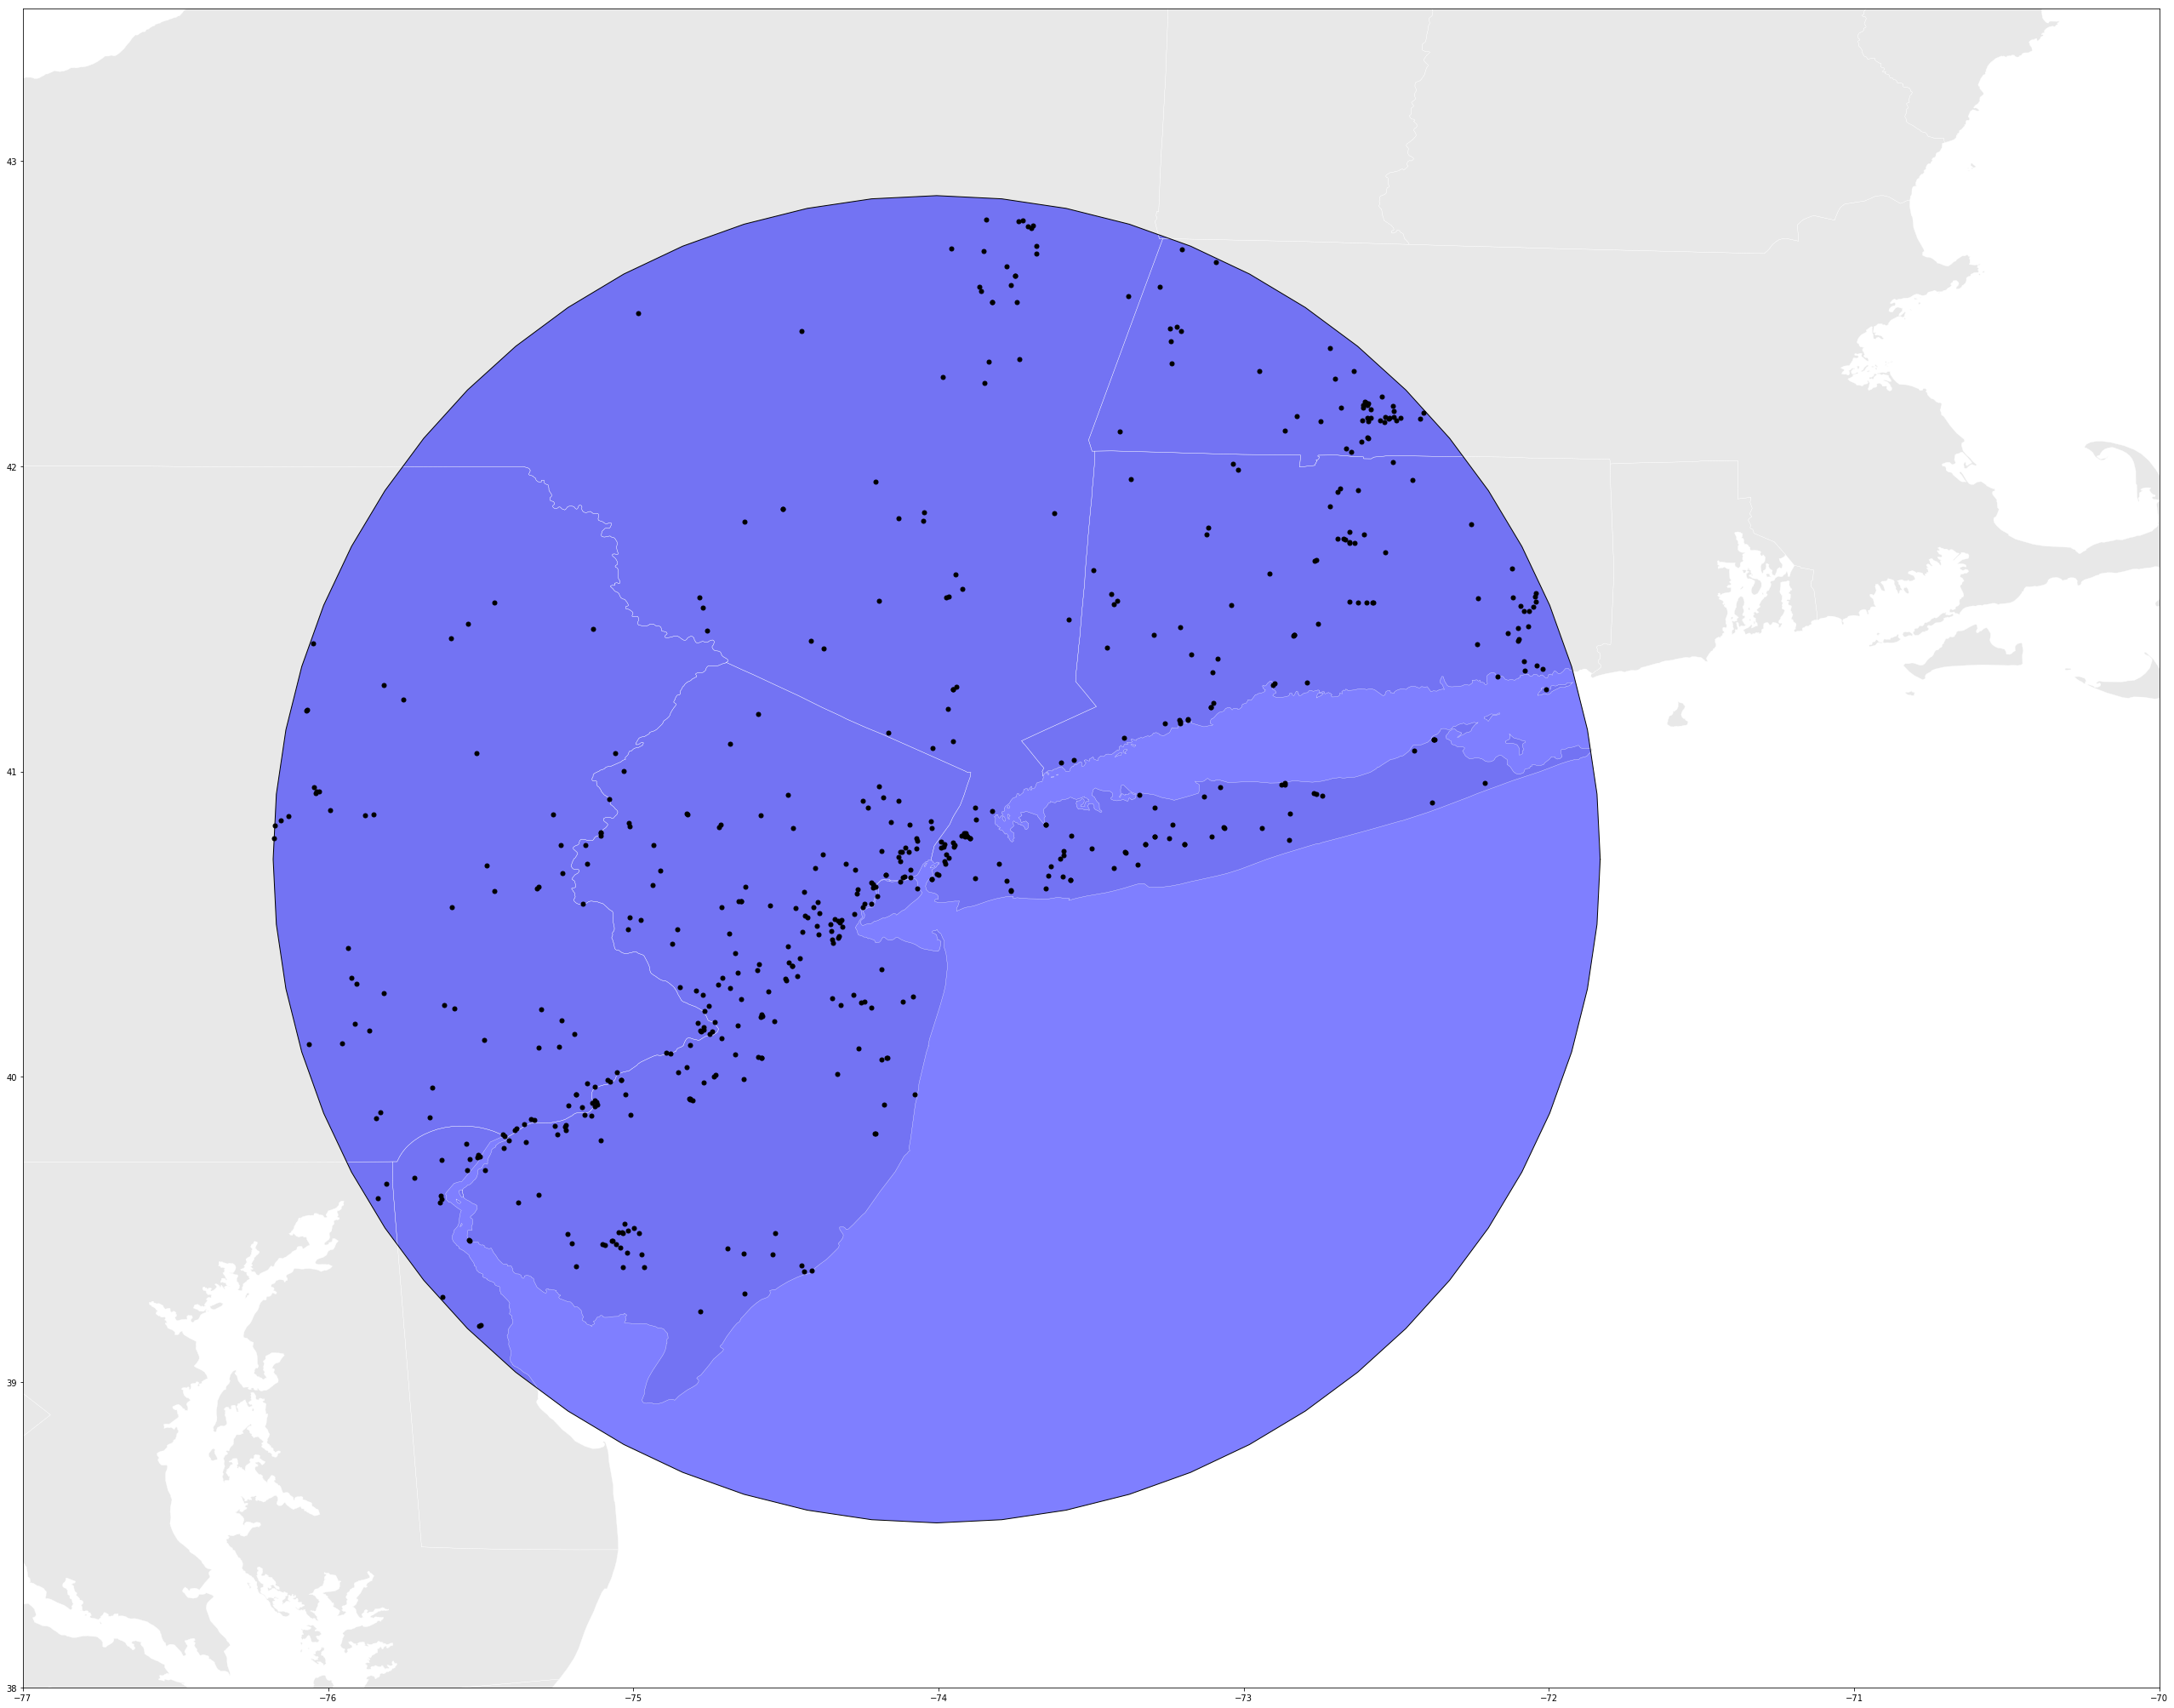

In [50]:
## Plot the states
ax = continental_states.plot(color='lightgrey', edgecolor='white', linewidth=0.3, figsize=(45,45))
## Plot New York City point and its buffer
new_york_buffer = Point(-74.0059413, 40.7127837).buffer(2.17391304348)
## Buffer is a polygon, so we use plot_polygon()
gpd.plotting.plot_polygon(ax=ax, poly=new_york_buffer, facecolor='blue')
## Plot the powerplants that are inside that buffer
powerplants[powerplants.within(new_york_buffer)].plot(ax=ax, color='black', markersize=5)
## Source: https://stackoverflow.com/questions/11400579/pyplot-zooming-in
ax.axis([-77,-70,38,43.5])

### 7.	Are places with below-average air quality closer to power plants?

In [51]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [52]:
continental_bounds = [
            [
              -128.671875,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              50.28933925329178
            ],
            [
              -128.671875,
              50.28933925329178
            ],
            [
              -128.671875,
              22.268764039073968
            ]
        ]

continental_box = Polygon(continental_bounds)
continental_states = states[states.within(continental_box)]
#continental_states.plot()

In [53]:
powerplants = pd.read_csv('powerplants.csv')
powerplants['geometry'] = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants)
powerplants.crs = {'init': 'epsg:4269'}
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [54]:
continental_plants = powerplants[powerplants.within(continental_box)]

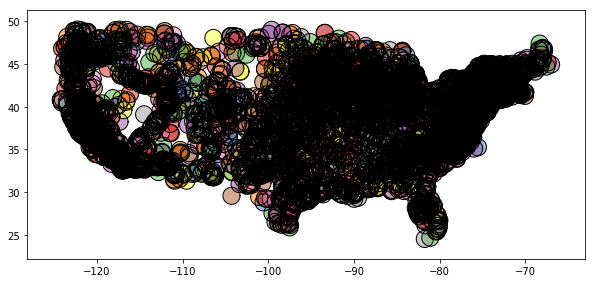

In [55]:
continental_plants.buffer(1).plot(figsize=(10,10))

In [56]:
plants_union = continental_plants.buffer(1).unary_union

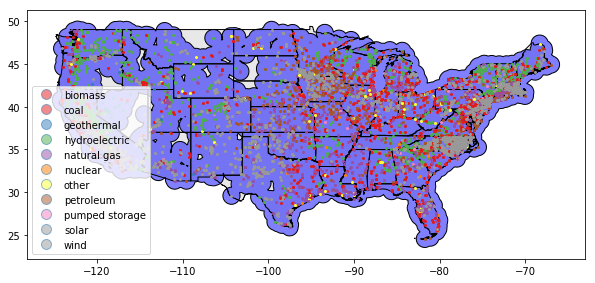

In [57]:
# Plotted the powerplants themselves, instead of the air quality stations
ax = continental_states.plot(color='lightgrey', figsize=(10,10))
gpd.plotting.plot_multipolygon(ax=ax, geom=plants_union, facecolor='blue')
powerplants[powerplants.within(plants_union)].plot(ax=ax, column='PrimSource', legend=True, markersize=2)

In [58]:
air = pd.read_csv('pm25_annual_fixed.csv')
air['geometry'] = air.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
air = gpd.GeoDataFrame(air)
air.crs = {'init': 'epsg:4269'}
air.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)


In [59]:
air['Arithmetic Mean'].mean()

7.938500167800453

In [60]:
air_below_mean = air[air['Arithmetic Mean'] > air['Arithmetic Mean'].mean()]
air_below_mean.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,8.083333,3.146436,14.8,2017-03-05 00:00,14.6,2017-02-18 00:00,13.1,2017-02-21 00:00,12.3,2017-01-16 00:00,NaN,NaN,NaN,NaN,14.8,14.8,14.6,13.1,9.6,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (-85.969858 34.288567)


In [61]:
air_above_mean = air[air['Arithmetic Mean'] < air['Arithmetic Mean'].mean()]
air_above_mean.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (-87.638097 34.762619)


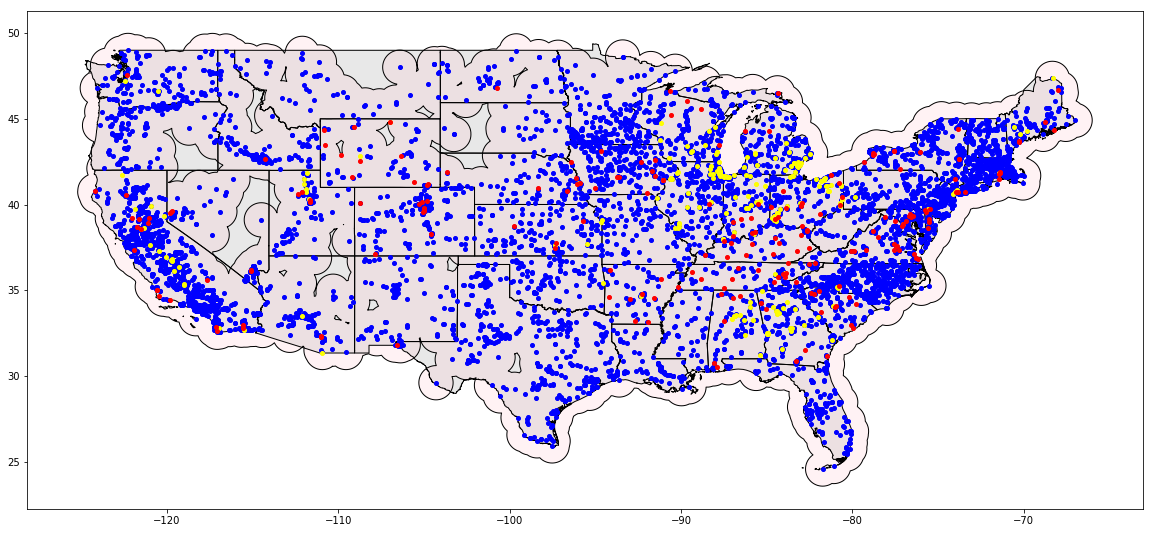

In [62]:
ax = continental_states.plot(color='lightgrey', figsize=(20,20))
gpd.plotting.plot_multipolygon(ax=ax, geom=plants_union, facecolor='pink', alpha=0.2)
powerplants[powerplants.within(plants_union)].plot(ax=ax, color='blue', markersize=4)
air_below_mean[air_below_mean.within(plants_union)].plot(ax=ax, markersize=4, color='yellow')
air_above_mean[air_above_mean.within(plants_union)].plot(ax=ax, markersize=4, color='red')